# Exploratory analysis of stock prices

In [13]:
#!pip install scipy
#!pip install plotly
import scipy as sp
from collections import Counter
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time
import yfinance as yf
from datetime import datetime, timedelta

## Loading dataframe

<b> IMPORTANT </b>
<br></br>

This dataframe has the closing prices 7,3 days before and after the filing date. However, if we use the approach below this is no longer needed in the dataframe.

In [2]:
df = pd.read_csv('/Users/danielbejarano/Documents/MSc. Information Management/Thesis/final-data')
df.head()

,Unnamed: 0,CIK Code,Filing,Date Filed,Ticker,CompanyName,Reference Date,Current Close,Close_Price_7_Days_Before,Close_Price_3_Days_Before,Close_Price_3_Days_Later,Close_Price_7_Days_Later
0,0,1680378,Investing in ourshares of common stock involve...,2021-03-18,SNES,"SenesTech, Inc.",2021-03-18,1.6799999475479126,1.7100000381469727,1.7400000095367432,1.9900000095367432,1.9700000286102295
1,1,1222719,Investing in any of our securities involves ri...,2021-01-31,CHY,CALAMOS CONVERTIBLE & HIGH INCOME FUND,2021-02-01,14.600000381469727,14.9399995803833,14.350000381469727,15.239999771118164,15.5600004196167
2,2,1364954,An investment in our securities involves a hig...,2021-02-17,CHGG,"CHEGG, INC",2021-02-17,103.45999908447266,105.02999877929688,[],108.77999877929688,98.1500015258789
3,3,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",2021-03-23,108.55000305175781,109.36000061035156,105.95999908447266,95.2300033569336,92.33999633789062
4,4,1409375,Investing in our common stock involves a high ...,2021-03-03,OESX,"ORION ENERGY SYSTEMS, INC.",2021-03-23,7.460000038146973,8.050000190734863,8.079999923706055,7.130000114440918,6.900000095367432


In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,CIK Code,Filing,Date Filed,Ticker,CompanyName,Reference Date,Current Close,Close_Price_7_Days_Before,Close_Price_3_Days_Before,Close_Price_3_Days_Later,Close_Price_7_Days_Later
0,1680378,Investing in ourshares of common stock involve...,2021-03-18,SNES,"SenesTech, Inc.",2021-03-18,1.6799999475479126,1.7100000381469727,1.7400000095367432,1.9900000095367432,1.9700000286102295
1,1222719,Investing in any of our securities involves ri...,2021-01-31,CHY,CALAMOS CONVERTIBLE & HIGH INCOME FUND,2021-02-01,14.600000381469727,14.9399995803833,14.350000381469727,15.239999771118164,15.5600004196167
2,1364954,An investment in our securities involves a hig...,2021-02-17,CHGG,"CHEGG, INC",2021-02-17,103.45999908447266,105.02999877929688,[],108.77999877929688,98.1500015258789
3,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",2021-03-23,108.55000305175781,109.36000061035156,105.95999908447266,95.2300033569336,92.33999633789062
4,1409375,Investing in our common stock involves a high ...,2021-03-03,OESX,"ORION ENERGY SYSTEMS, INC.",2021-03-23,7.460000038146973,8.050000190734863,8.079999923706055,7.130000114440918,6.900000095367432


In [4]:
df = df.drop_duplicates('Ticker', keep = 'last')
df

,CIK Code,Filing,Date Filed,Ticker,CompanyName,Reference Date,Current Close,Close_Price_7_Days_Before,Close_Price_3_Days_Before,Close_Price_3_Days_Later,Close_Price_7_Days_Later
0,1680378,Investing in ourshares of common stock involve...,2021-03-18,SNES,"SenesTech, Inc.",2021-03-18,1.6799999475479126,1.7100000381469727,1.7400000095367432,1.9900000095367432,1.9700000286102295
1,1222719,Investing in any of our securities involves ri...,2021-01-31,CHY,CALAMOS CONVERTIBLE & HIGH INCOME FUND,2021-02-01,14.600000381469727,14.9399995803833,14.350000381469727,15.239999771118164,15.5600004196167
2,1364954,An investment in our securities involves a hig...,2021-02-17,CHGG,"CHEGG, INC",2021-02-17,103.45999908447266,105.02999877929688,[],108.77999877929688,98.1500015258789
3,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",2021-03-23,108.55000305175781,109.36000061035156,105.95999908447266,95.2300033569336,92.33999633789062
4,1409375,Investing in our common stock involves a high ...,2021-03-03,OESX,"ORION ENERGY SYSTEMS, INC.",2021-03-23,7.460000038146973,8.050000190734863,8.079999923706055,7.130000114440918,6.900000095367432
...,...,...,...,...,...,...,...,...,...,...,...
422,21535,Risks Related to this OfferingThe trading pric...,2020-03-10,COHU,COHU INC,2020-07-01,16.59000015258789,16.290000915527344,16.780000686645508,[],16.75
423,1716951,Investing in our securities involves a number ...,2021-03-02,OCCI,"OFS Credit Company, Inc.",2020-06-01,9.600000381469727,[],9.449999809265137,10.210000038146973,10.6899995803833
424,1705696,An investment in our common stock involves ris...,2020-12-31,VICI,VICI PROPERTIES INC.,2020-06-01,20.600000381469727,[],19.6200008392334,22.229999542236328,22.829999923706055
425,1094517,Investing in the notes involves risks. You sho...,2021-03-25,TM,TOYOTA MOTOR CORP/,2020-06-01,126.44999694824219,[],126.01000213623047,128.16000366210938,132.07000732421875


## READ HERE

The idea is the following:
<br></br>
<br></br>
Given a company C that issues a filing at time T, we are going to calculate the average price change N days before and after T. In order to normalize the price changes, we divide them by the average price change of the S&P500 in the same period (this is to cancel any increase in value that occurs just from the fact that there is more volume being traded). After normalizing there are three possible scenarios:
<br></br>
1. If change > 1% --> the trend is increasing
2. If change < -1% --> the trend is decreasing
3. If -1% < change < 1% --> the trend stays neutral

<br></br>
<br></br>
Now note that the trends we refer to above are for the period before and after the filing (see section 1.3 Labelling). We have two average price change trends per company (previous to the filing day a.k.a PrevAvgPriceChange; and following the filing day a.k.a PostAvgPriceChange). 
<br></br>
This means that there are 9 possible trend combinations (e.g. before the filing day the trend could be decreasing, and after the filing day it could be increasing, in this case we label the effect of the filing as if it had cause an increase in prices).

In [43]:
def get_stats2(df, time_delta):
    ticker_list = list(df['Ticker'])
    date_list= list(df['Reference Date'])
    
    names = []
    prev_deltas = []
    next_deltas = []    
    
    for i,j in zip(ticker_list, date_list):
        # calculating the different day limits we are going to use to measure the price change
        past_limit = (datetime.strptime(j, '%Y-%m-%d') + timedelta(days = - time_delta)).strftime('%Y-%m-%d')
        future_limit = future_limit = (datetime.strptime(j, '%Y-%m-%d') + timedelta(days = + time_delta)).strftime('%Y-%m-%d')
        
        # querying data
        past_data = yf.download(tickers = i, start = past_limit, end = j)
        past_sp500 = yf.download(tickers = '^GSPC', start = past_limit, end = j)
        future_data = yf.download(tickers = i, start = j, end = future_limit)
        future_sp500 = yf.download(tickers = '^GSPC', start = j, end = future_limit)
        
        # selecting only the adjusted close prices
        past_data = np.array(past_data['Adj Close'])
        past_sp500 = np.array(past_sp500['Adj Close'])
        future_data = np.array(future_data['Adj Close'])
        future_sp500 = np.array(future_sp500['Adj Close'])
        
        #calculating respective average price changes per time block
        past_deltas = np.nanmean(np.diff(past_data))
        past_deltas_sp500 = np.nanmean(np.diff(past_sp500))
        future_deltas = np.nanmean(np.diff(future_data))
        future_deltas_sp500 = np.nanmean(np.diff(future_sp500))
        
        #normalizing the price changes per time block by the average price change in S&P500
        norm_past_deltas = past_deltas/past_deltas_sp500
        norm_future_deltas = future_deltas/future_deltas_sp500
        
        prev_deltas.append(norm_past_deltas)
        next_deltas.append(norm_future_deltas)
        names.append(i)
        
    dic = {
        'Ticker': names,
        'PrevAvgPriceChange': prev_deltas,
        'PostAvgPriceChange': next_deltas
    }
        
    return pd.DataFrame(dic)

In [44]:
exp1 = get_stats2(df, time_delta = 5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MOVE: Data doesn't exist for startDate = 1608937200, endDate = 1609369200
[******

## LABELLING

In [45]:
exp1.head()

,Ticker,PrevAvgPriceChange,PostAvgPriceChange
0,SNES,-0.000325,-0.008351
1,CHY,0.003499,0.006552
2,CHGG,0.347312,0.124420
3,FLGT,0.322397,-0.428572
4,OESX,0.004772,-0.026215


So in the column above we have the (normalized) price change trends before and after the filing. We are going to label each trend (before/after), and then we are going to compare whether there was a change in the label.

In [47]:
prev_labels = []
next_labels = []
final_labels = []

for i in range(len(exp1)):
    if exp1['PrevAvgPriceChange'][i] > 0.01:
        prev_labels.append('up')
    elif exp1['PrevAvgPriceChange'][i] < -0.01:
        prev_labels.append('down')
    else:
        prev_labels.append('stay')
        
    if exp1['PostAvgPriceChange'][i] > 0.01:
        next_labels.append('up')
    elif exp1['PostAvgPriceChange'][i] < -0.01:
        next_labels.append('down')
    else:
        next_labels.append('stay')
        

In [51]:
for i,j in zip(prev_labels, next_labels):
    if i == j:
        final_labels.append('neutral')
    else:
        if i == 'up':
            final_labels.append('decrease')
        elif i == 'down':
            final_labels.append('increase')
        else:
            if j == 'up':
                final_labels.append('increase')
            elif j == 'down':
                final_labels.append('decrease')

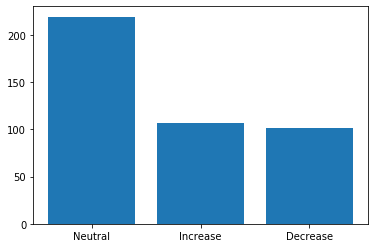

Price increased: 107 times
Price decreased: 101 times
Price did not move: 219 times


In [55]:
incr_counts = 0
decr_counts = 0
neutral_counts = 0

for i in final_labels:
    if i == 'neutral':
        neutral_counts += 1
    elif i == 'increase':
        incr_counts += 1

decr_counts = len(df) - (incr_counts + neutral_counts)        

counts = [neutral_counts, incr_counts, decr_counts]
labels = ['Neutral', 'Increase', 'Decrease']

plt.bar(labels, counts)
plt.ylim([0,230])
plt.show()

print('Price increased: {} times'.format(incr_counts))
print('Price decreased: {} times'.format(decr_counts))
print('Price did not move: {} times'.format(neutral_counts))
